In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import equinox as eqx
import diffrax as dfx
import growth_rate_08f
import growth_rate_10f
import growth_rate_12f

seeds = [1,3,4,5,6]
systems_08 = []
systems_10 = []
systems_12 = []
learned_systems_08 = []
learned_systems_10 = []
learned_systems_12 = []
for seed in seeds:
    systems_08.append(growth_rate_08f.BigField(num_neurons=40,seed=seed))
    systems_10.append(growth_rate_10f.BigField(num_neurons=40,seed=seed))
    systems_12.append(growth_rate_12f.BigField(num_neurons=40,seed=seed))
    learned_systems_08.append(eqx.tree_deserialise_leaves('./growth_rate_08/epoch_2235seed_2val8.17067871939151.eqx' , systems_08[-1]))
    learned_systems_10.append(eqx.tree_deserialise_leaves('./growth_rate_10/epoch_1814seed_2val10.393508191545337.eqx' , systems_10[-1]))
    learned_systems_12.append(eqx.tree_deserialise_leaves('./growth_rate_12/epoch_1240seed_2val13.199771825693924.eqx' , systems_12[-1]))

self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0
self.steepness:  -7.0


In [2]:
def sample_traj(system):
    t0 = 0.0
    t1 = 40.0
    dt = 0.04
    tprev = t0
    tnext = t0 + dt


    solver = dfx.Tsit5()
    term = dfx.ODETerm(system.term)
    (x_init, s_init, e_init) = system.reset()
    obs = jnp.array([jnp.sin(x_init[0][0]), jnp.cos(x_init[0][0]), x_init[0][1],
                     jnp.sin(x_init[0][2]), jnp.cos(x_init[0][2]), x_init[0][3],
                     s_init[0][5], s_init[0][7], e_init[0][0]])
    z_init = system.produce_z(obs)
    y = (x_init[0], z_init, s_init[0], e_init[0])
    args = None
    state = solver.init(term, tprev, tnext, y, args)
    cumulutive_resources = []
    ss=[]
    while tprev < t1:
        y, _, _, state, _ = solver.step(term, tprev, tnext, y, args, state, made_jump=False)
        tprev = tnext
        tnext = min(t1, tprev+dt)
        cumulutive_resources.append(y[3])
        ss.append(y[2])
    return cumulutive_resources,ss

In [3]:
crs_08,sss_08 = [],[]
crs10,sss10 = [],[]
crs12,sss12 = [],[]

for i in range(len(seeds)):
    cr_08,ss_08 = sample_traj(learned_systems_08[i])
    crs_08.append(cr_08)
    sss_08.append(ss_08)

    cr_10,ss_10 = sample_traj(learned_systems_10[i])
    crs10.append(cr_10)
    sss10.append(ss_10)

    cr_12,ss_12 = sample_traj(learned_systems_12[i])
    crs12.append(cr_12)
    sss12.append(ss_12)

In [4]:
def patch_arrival(ss):
    patch_arrival_times = []
    ss = jnp.array(ss)
    ss0 = ss[:,0]
    ss1 = ss[:,1]
    flag0 = False
    flag1 = False
    for i in range(len(ss0)-1):
        if ss0[i+1] < ss0[i] and flag0 == False:
            patch_arrival_times.append(i)
            flag0 = True
        elif ss0[i+1] > ss0[i]:
            flag0 = False
        if ss1[i+1] < ss1[i] and flag1 == False:
            patch_arrival_times.append(i)
            flag1 = True
        elif ss1[i+1] > ss1[i]:
            flag1 = False
    #print(patch_arrival_times)
    return patch_arrival_times

def patch_departure(ss0, ss1):
    patch_departure_times = []
    flag0 = True
    flag1 = True
    for i in range(len(ss0)-1):
        if ss0[i+1] > ss0[i] and flag0 == False:
            patch_departure_times.append(i)
            flag0 = True
        elif ss0[i+1] < ss0[i]:
            flag0 = False
        if ss1[i+1] > ss1[i] and flag1 == False:
            patch_departure_times.append(i)
            flag1 = True
        elif ss1[i+1] < ss1[i]:
            flag1 = False
    #print(patch_departure_times)
    return patch_departure_times

In [5]:
sss_08 = jnp.array(sss_08)
sss10 = jnp.array(sss10)
sss12 = jnp.array(sss12)
patch_arrival_times_08 = []
patch_departure_times_08 = []
patch_arrival_times_10 = []
patch_departure_times_10 = []
patch_arrival_times_12 = []
patch_departure_times_12 = []
for i in range(len(seeds)):
    patch_arrival_times_08.append(patch_arrival(sss_08[i]))
    patch_departure_times_08.append(patch_departure(sss_08[i][:,0],sss_08[i][:,1]))
    patch_arrival_times_10.append(patch_arrival(sss10[i]))
    patch_departure_times_10.append(patch_departure(sss10[i][:,0],sss10[i][:,1]))
    patch_arrival_times_12.append(patch_arrival(sss12[i]))
    patch_departure_times_12.append(patch_departure(sss12[i][:,0],sss12[i][:,1]))

print("patch_arrival_times_08",patch_arrival_times_08)
print("patch_departure_times_08",patch_departure_times_08)
print("patch_arrival_times_10",patch_arrival_times_10)
print("patch_departure_times_10",patch_departure_times_10)
print("patch_arrival_times_12",patch_arrival_times_12)
print("patch_departure_times_12",patch_departure_times_12)


patch_arrival_times_08 [[169, 317, 521, 756], [1, 141, 307, 544, 937], [27, 110, 302, 582, 870], [94, 275, 520, 783], [95, 244, 460, 835]]
patch_departure_times_08 [[251, 456, 676], [16, 246, 464, 847], [50, 234, 493, 770], [203, 443, 694], [177, 384, 749]]
patch_arrival_times_10 [[302, 412, 604, 817], [2, 113, 271, 497, 730, 932], [29, 166, 347, 572, 791, 996], [150, 320, 566, 798, 994], [103, 269, 490, 711, 915]]
patch_departure_times_10 [[358, 533, 743, 961], [15, 197, 406, 641, 854], [52, 281, 486, 697, 911], [262, 485, 706, 913], [203, 406, 621, 834]]
patch_arrival_times_12 [[174, 336, 510, 701, 932], [2, 117, 295, 525, 730, 950], [30, 161, 358, 583, 806], [116, 305, 523, 716, 937], [124, 295, 502, 705, 918]]
patch_departure_times_12 [[264, 435, 610, 851], [14, 230, 439, 633, 854], [50, 291, 494, 675, 932], [241, 435, 626, 848], [227, 418, 595, 836]]


In [8]:
first_three_patch_times_08 = []
first_three_patch_times_10 = []
first_three_patch_times_12 = []
for i in range(len(seeds)):
    for j in range(3):
        first_three_patch_times_08.append(patch_departure_times_08[i][j]-patch_arrival_times_08[i][j])
        first_three_patch_times_10.append(patch_departure_times_10[i][j]- patch_arrival_times_10[i][j])
        first_three_patch_times_12.append(patch_departure_times_12[i][j] - patch_arrival_times_12[i][j])
first_three_patch_times_08 = jnp.array(first_three_patch_times_08)
first_three_patch_times_10 = jnp.array(first_three_patch_times_10)
first_three_patch_times_12 = jnp.array(first_three_patch_times_12)
print("first_three_patch_times_08",first_three_patch_times_08)
print("first_three_patch_times_10",first_three_patch_times_10)
print("first_three_patch_times_12",first_three_patch_times_12)

first_three_patch_times_08 [ 82 139 155  15 105 157  23 124 191 109 168 174  82 140 289]
first_three_patch_times_10 [ 56 121 139  13  84 135  23 115 139 112 165 140 100 137 131]
first_three_patch_times_12 [ 90  99 100  12 113 144  20 130 136 125 130 103 103 123  93]


In [6]:
import numpy as np

In [9]:
growth_rate_08_mean = np.mean(first_three_patch_times_08)
growth_rate_10_mean = np.mean(first_three_patch_times_10)
growth_rate_12_mean = np.mean(first_three_patch_times_12)
print("mean_patch_times_08",growth_rate_08_mean)
print("mean_patch_times_10",growth_rate_10_mean)
print("mean_patch_times_12",growth_rate_12_mean)

mean_patch_times_08 130.2
mean_patch_times_10 107.33333333333333
mean_patch_times_12 101.4


In [10]:
#this code will calculate the mean of the first three patch times
growth_rate_08_mean_per_seed = []
growth_rate_10_mean_per_seed = []
growth_rate_12_mean_per_seed = []
for i in range(len(seeds)):
    patch_times_08=[]
    patch_times_10=[]
    patch_times_12=[]
    for j in range(3):
        patch_times_08.append(patch_departure_times_08[i][j]-patch_arrival_times_08[i][j])
        patch_times_10.append(patch_departure_times_10[i][j]- patch_arrival_times_10[i][j])
        patch_times_12.append(patch_departure_times_12[i][j] - patch_arrival_times_12[i][j])
    patch_times_08 = jnp.array(patch_times_08)
    patch_times_10 = jnp.array(patch_times_10)
    patch_times_12 = jnp.array(patch_times_12)
    growth_rate_08_mean_per_seed.append(np.mean(patch_times_08))
    growth_rate_10_mean_per_seed.append(np.mean(patch_times_10))
    growth_rate_12_mean_per_seed.append(np.mean(patch_times_12))
growth_rate_08_mean_per_seed = jnp.array(growth_rate_08_mean_per_seed)
growth_rate_10_mean_per_seed = jnp.array(growth_rate_10_mean_per_seed)
growth_rate_12_mean_per_seed = jnp.array(growth_rate_12_mean_per_seed)

growth_rate_08_var = np.var(growth_rate_08_mean_per_seed)
growth_rate_10_var = np.var(growth_rate_10_mean_per_seed)
growth_rate_12_var = np.var(growth_rate_12_mean_per_seed)
growth_rate_08_std_dev = np.sqrt(growth_rate_08_var)
growth_rate_10_std_dev = np.sqrt(growth_rate_10_var)
growth_rate_12_std_dev = np.sqrt(growth_rate_12_var)


In [11]:
import seaborn as sns

sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

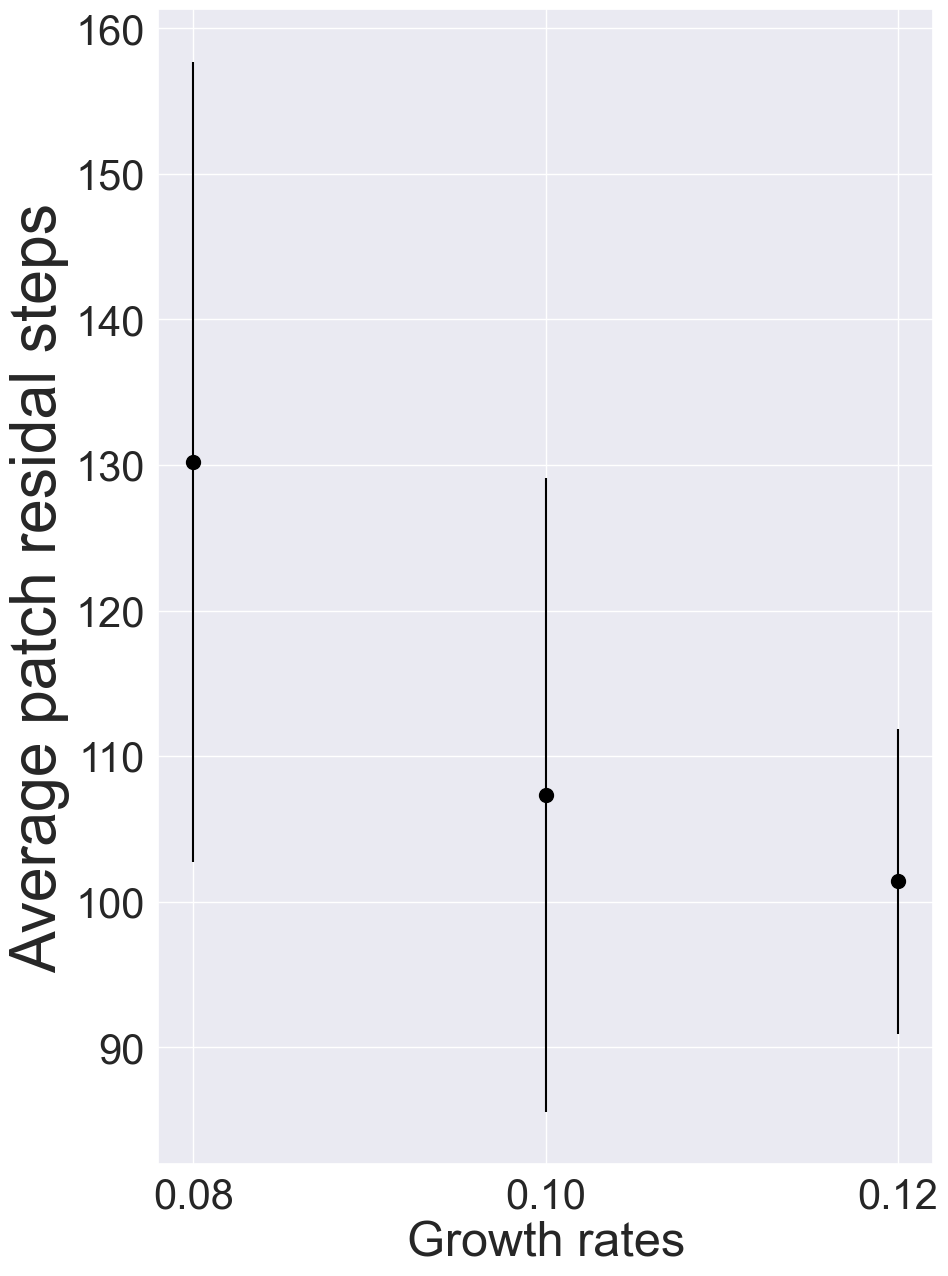

In [13]:
ax, fig = plt.subplots(figsize=(10,15))

plt.scatter([0.08, 0.1, 0.12], [growth_rate_08_mean, growth_rate_10_mean, growth_rate_12_mean], color="black", s=100)
plt.errorbar([0.08, 0.1, 0.12], [growth_rate_08_mean, growth_rate_10_mean, growth_rate_12_mean], yerr=[growth_rate_08_std_dev, growth_rate_10_std_dev, growth_rate_12_std_dev], fmt="o", color="black")
plt.xlabel("Growth rates", fontsize=35)
plt.ylabel("Average patch residal steps", fontsize=45)
plt.xticks([0.08, 0.1, 0.12], fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("avg_patch_residing_time.svg", bbox_inches='tight')
plt.show()